In [7]:
import torch
from torchvision import transforms
import matplotlib.pyplot as plt
from model import Discriminator, Generator
import sys
sys.path.append('/home/eric/ml2/src')  # Add the project root to Python path
from utils import lfw_dataset_handler as lfw
from train import load_checkpoint
import paths_config as paths
import os

In [20]:
def visualize_results(G, test_loader, device, num_images=5):
    """
    Visualización de Resultados
    ==========================
    
    Muestra comparación entre:
    - Imágenes originales
    - Sus reconstrucciones por el autoencoder
    
    Esto permite evaluar visualmente:
    1. Calidad de la reconstrucción
    2. Qué características preserva mejor el modelo
    3. Qué tipos de artefactos o distorsiones introduce
    """
    G.eval()
    
    with torch.no_grad():
        # Generar ruido aleatorio
        noise = torch.randn(num_images, 100, device=device)
        fake_images = G(noise)
        # Obtener un batch de imágenes
        # batch, _ = next(iter(test_loader))
        # batch = batch.to(device)
        outputs = G(noise)
        
        n = min(num_images, noise.size(0))
        
        plt.figure(figsize=(12, 4))
        for i in range(n):
                       
            # Generadas
            plt.subplot(1, n, i + 1)
            plt.imshow(outputs[i].cpu().permute(1, 2, 0))
            plt.axis('off')
            if i == 0:
                plt.title('Generadas a partir de ruido')
        
        plt.tight_layout()
        plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset lfw encontrado en disco.
Device: cuda


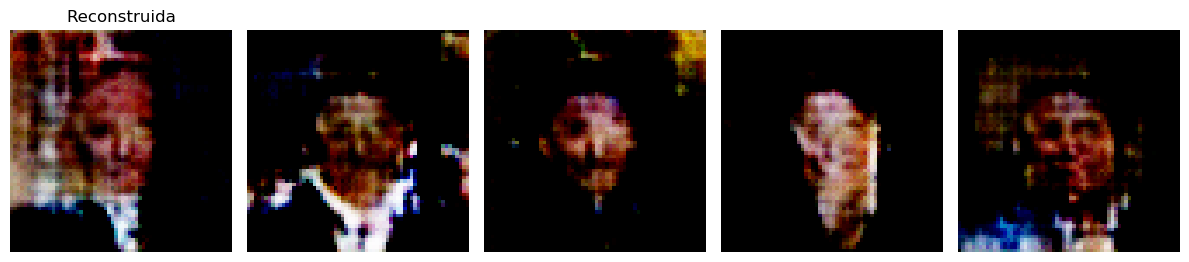

In [19]:
# Load the best model checkpoint
model_path = '/home/eric/ml2/src/GAN/out/checkpoints/best_G_model.pth'
best_model = torch.load(model_path, weights_only=True)

# Definir transformaciones
transform = transforms.Compose([
        transforms.Resize(64),
        transforms.CenterCrop(64),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

_, _, test_loader = lfw.get_data_loaders(
    batch_size=64,
    base_dir=paths.BASE_DATA_DIR,
    download=False,
    transform=transform
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device:', device)

# Crear y cargar el modelo
G = Generator().to(device)
G.load_state_dict(best_model['model_state_dict'])  # Aquí está el cambio


# Visualizar resultados
visualize_results(G, test_loader, device, num_images=5)